In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/drive/MyDrive/content/AQI.csv')

In [3]:
df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833


In [4]:
df['PM2.5 AQI Category'].replace({'Unhealthy for Sensitive Groups':'Very Unhealthy','Hazardous':'Very Unhealthy'},inplace=True)

In [5]:
df['AQI Category'].replace({'Unhealthy for Sensitive Groups':'Very Unhealthy','Hazardous':'Very Unhealthy'},inplace=True)

In [6]:
df['CO AQI Category'].replace({'Unhealthy for Sensitive Groups':'Very Unhealthy','Hazardous':'Very Unhealthy'},inplace=True)

In [7]:
df['Ozone AQI Category'].replace({'Unhealthy for Sensitive Groups':'Very Unhealthy','Hazardous':'Very Unhealthy'},inplace=True)
df['NO2 AQI Category'].replace({'Unhealthy for Sensitive Groups':'Very Unhealthy','Hazardous':'Very Unhealthy'},inplace=True)

In [8]:
df.drop(['Country','City'],inplace=True,axis=1)

In [9]:
df['AQI Category'].unique()

array(['Moderate', 'Good', 'Unhealthy', 'Very Unhealthy'], dtype=object)

In [10]:
['PM2.5 AQI Category','AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category']
['Very Unhealthy','Unhealthy','Moderate','Good']

['Very Unhealthy', 'Unhealthy', 'Moderate', 'Good']

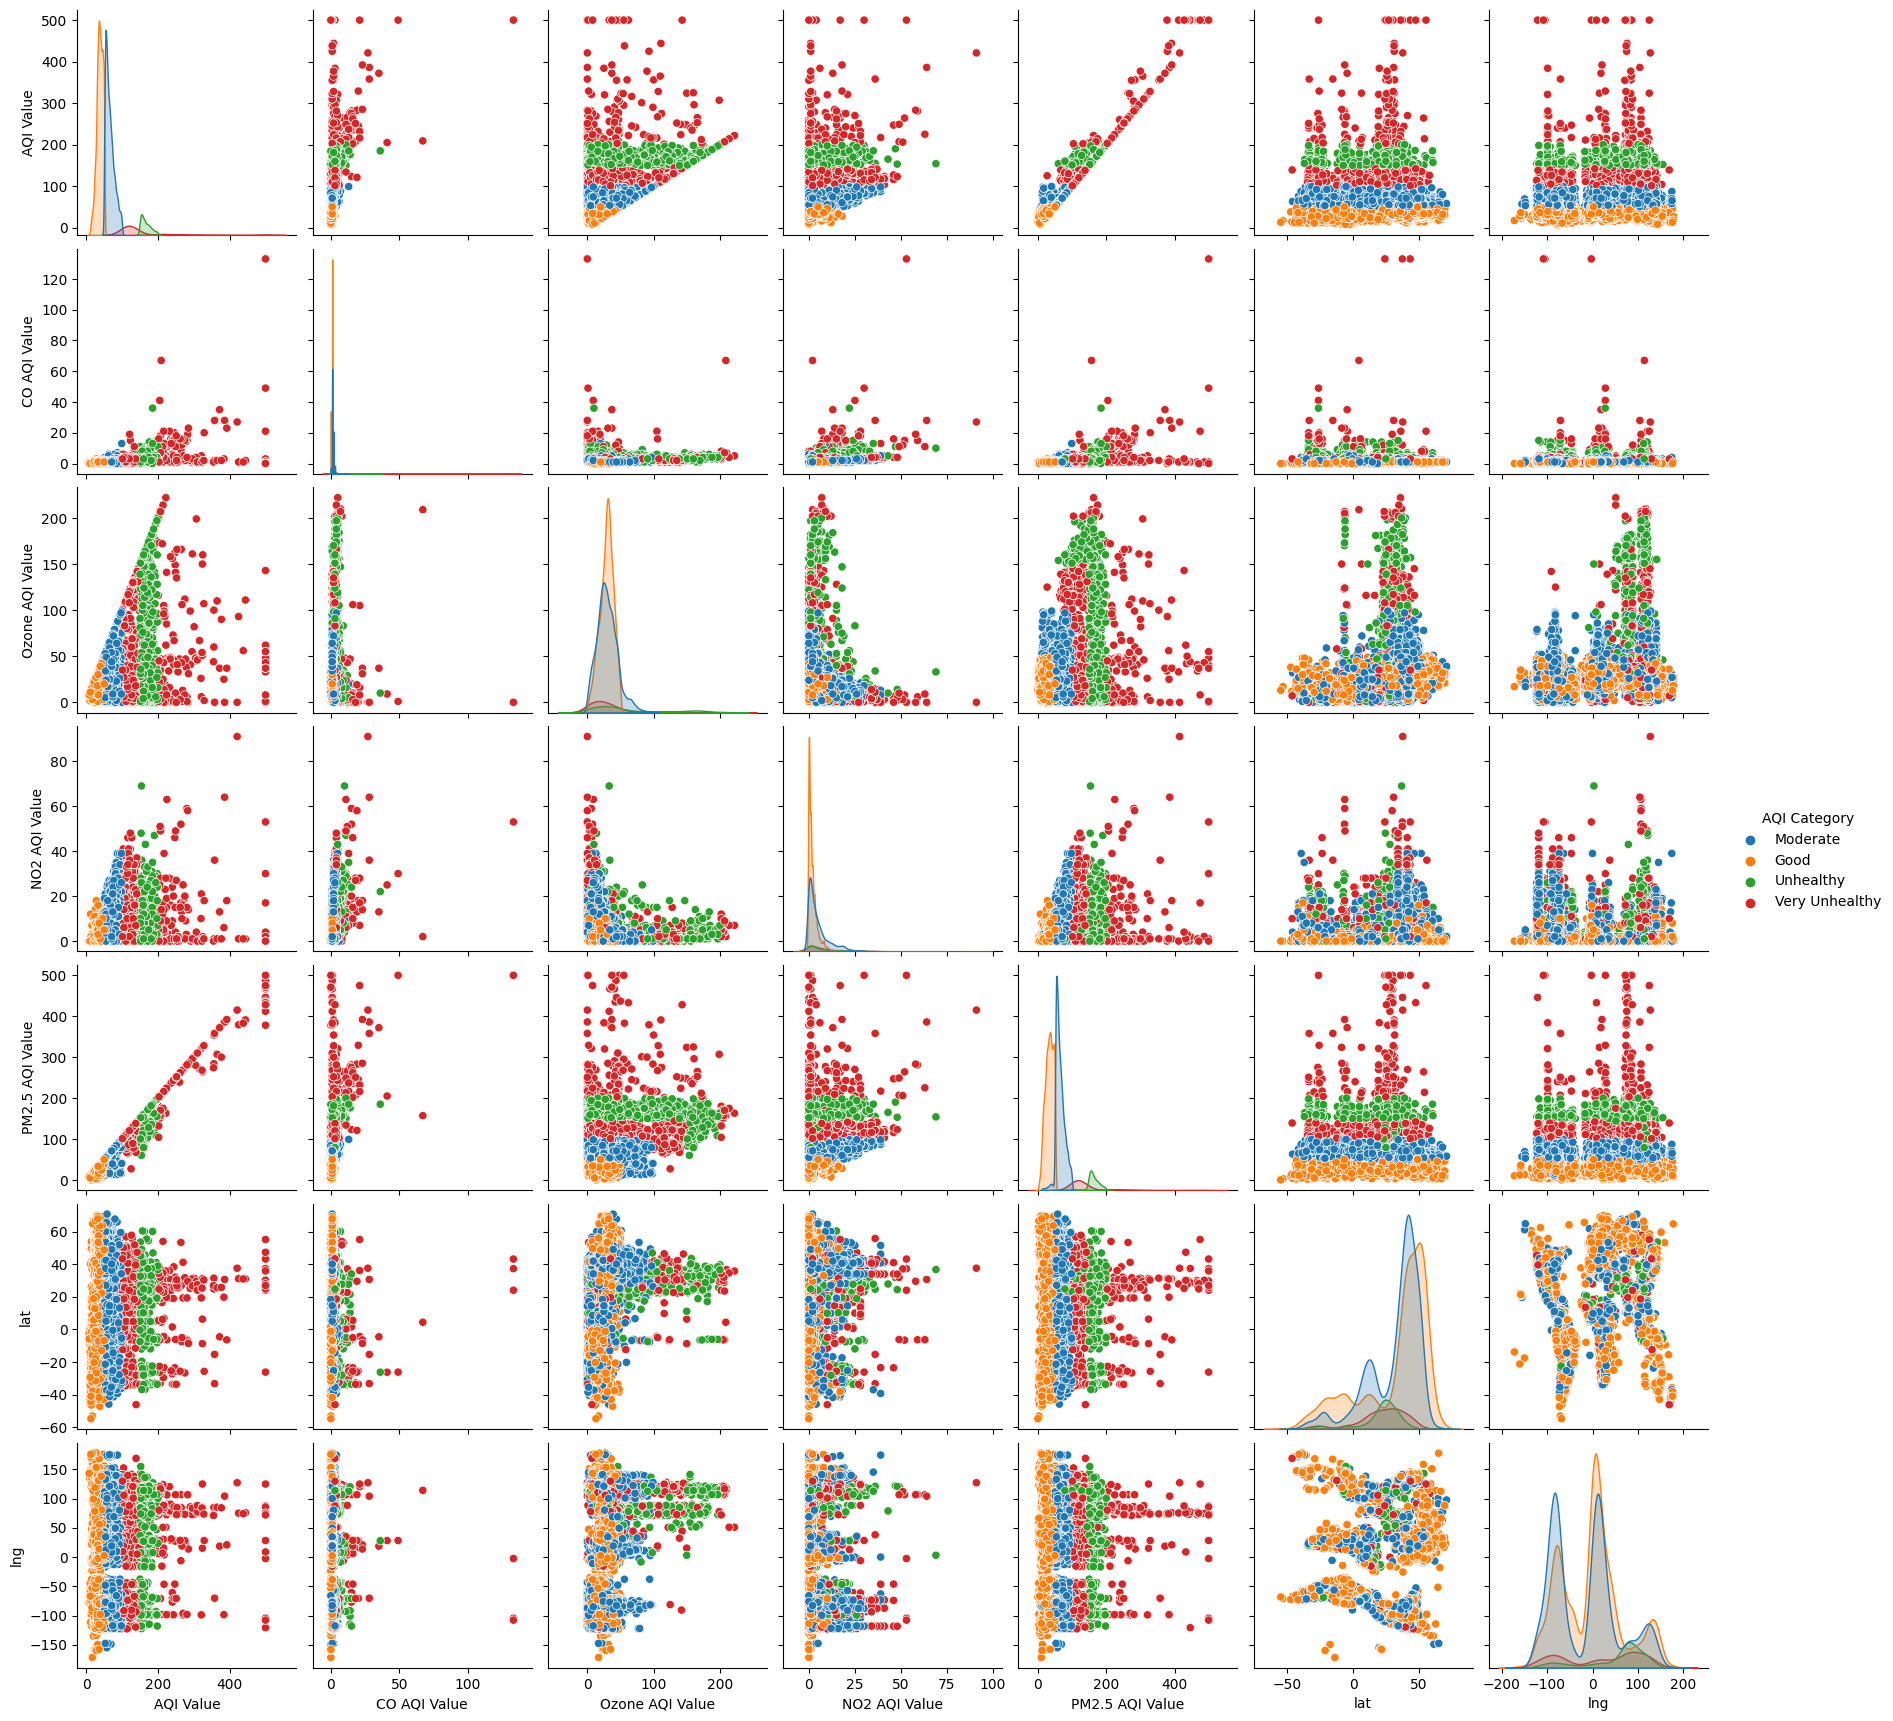

In [12]:
sns.pairplot(df,hue="AQI Category")

<ipython-input-14-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

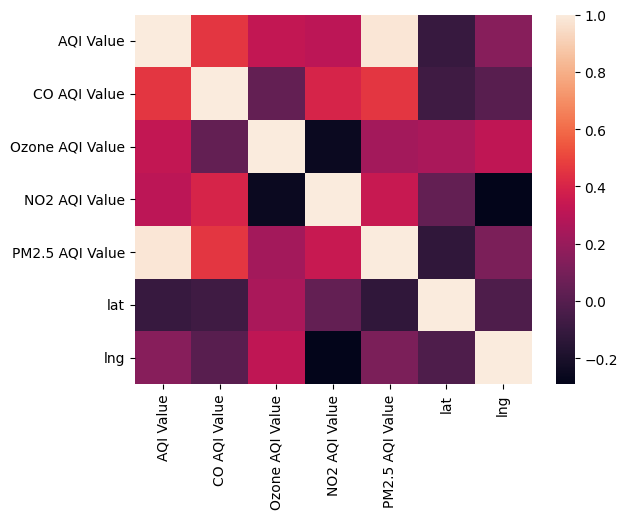

In [14]:
sns.heatmap(df.corr())

In [15]:
df.isna().sum()

AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
lat                   0
lng                   0
dtype: int64

In [16]:
df.dtypes


AQI Value               int64
AQI Category           object
CO AQI Value            int64
CO AQI Category        object
Ozone AQI Value         int64
Ozone AQI Category     object
NO2 AQI Value           int64
NO2 AQI Category       object
PM2.5 AQI Value         int64
PM2.5 AQI Category     object
lat                   float64
lng                   float64
dtype: object

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split

In [18]:
cat_cols=['AQI Category','CO AQI Category','Ozone AQI Category','NO2 AQI Category','PM2.5 AQI Category']

In [19]:
for col in cat_cols:
  df[col].replace({'Very Unhealthy':0,'Unhealthy':1,'Moderate':2,'Good':3},inplace=True)

In [20]:
df.dtypes

AQI Value               int64
AQI Category            int64
CO AQI Value            int64
CO AQI Category         int64
Ozone AQI Value         int64
Ozone AQI Category      int64
NO2 AQI Value           int64
NO2 AQI Category        int64
PM2.5 AQI Value         int64
PM2.5 AQI Category      int64
lat                   float64
lng                   float64
dtype: object

In [21]:
df.head(2)

,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,51,2,1,3,36,3,0,3,51,2,44.7444,44.2031
1,41,3,1,3,5,3,1,3,41,3,-5.2900,-44.4900


In [22]:
x=df.drop(['AQI Category'],axis=1)
y=df['AQI Category']

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=41)

# First of all trying at individual models and checking the accuracy

In [25]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
svc=SVC()

In [26]:
from sklearn.metrics import classification_report

In [27]:
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)

SVC()

In [28]:
yhat_dt=dt.predict(x_test)
yhat_rf=dt.predict(x_test)
yhat_svc=svc.predict(x_test)

In [30]:
print('\nClassification Report for Decision Tree\n')
print('-'*50)
print(classification_report(y_test,yhat_dt))
print('-'*50)
print('\nClassification Report for Random Forest\n')
print('-'*50)
print(classification_report(y_test,yhat_rf))
print('-'*50)
print('\nClassification Report for SVC\n')
print('-'*50)
print(classification_report(y_test,yhat_svc))
print('-'*50)


Classification Report for Decision Tree

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00      1433
           3       1.00      1.00      1.00      1521

    accuracy                           1.00      3339
   macro avg       1.00      1.00      1.00      3339
weighted avg       1.00      1.00      1.00      3339

--------------------------------------------------

Classification Report for Random Forest

--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       196
           1       1.00      1.00      1.00       189
           2       1.00      1.00      1.00      1433
           3       1.00      1.00      1.00      1521

    accuracy                           1.00      3339
  

# Random Forest and Decision Tree are perfoming outclass at this so we dont need to apply the voting classifier inshort ensemble learning

In [35]:
# lets predict something	51		1	3	36	3	0	3	51	2	44.7444	44.2031 Just changing query point a little bit
yhat_dt_q=dt.predict([[50,1,3,33,3 ,0,3,48,2,43,41]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
yhat_dt_q # 0=> very unhealthy 1=> unhealthy 2=> Moderate 3=> Good

array([3])

In [38]:
yhat_rf_q=rf.predict([[50,1,3,33,3 ,0,3,48,2,43,41]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [39]:
yhat_rf_q

array([3])

# Lets plot the decision tree using the dtreeviz library

In [40]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 2.8 MB/s eta 0:00:00


In [41]:
import dtreeviz

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


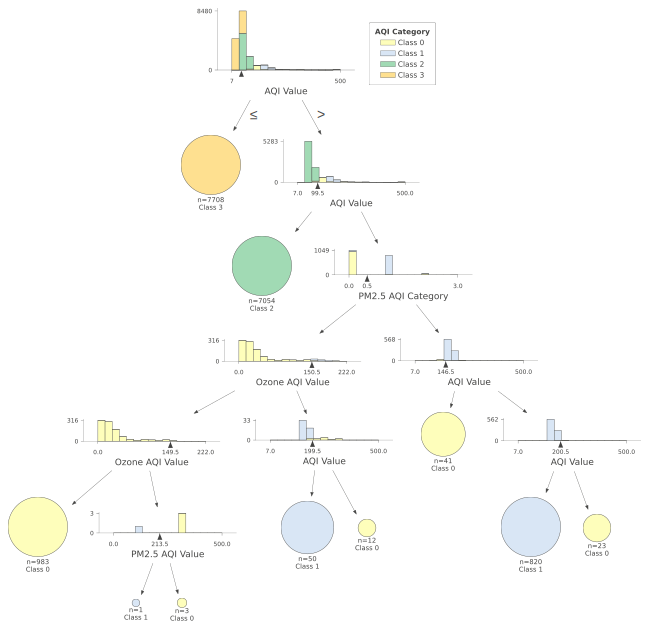

In [42]:
viz_model = dtreeviz.model(dt,
                           X_train=x, y_train=y,
                           feature_names=list(x.columns),
                           target_name='AQI Category')
viz_model.view()

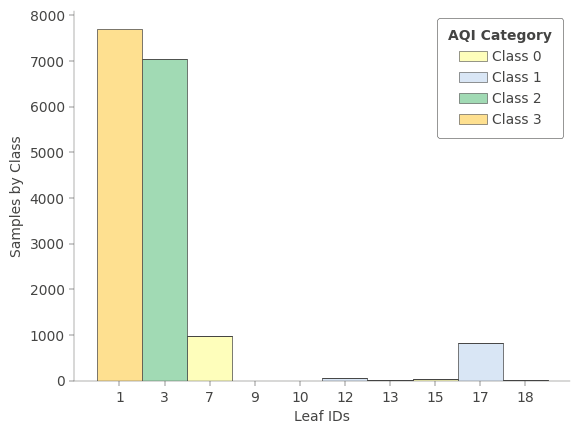

In [43]:
viz_model.ctree_leaf_distributions()